<a href="https://colab.research.google.com/github/jimmyboman/GenClass/blob/master/trainer_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install tensorflow==2.1.0
#print(tf.__version__)

NameError: ignored

In [3]:
import tensorflow as tf
from training import training_loader, make_generator, train
from models import binary_cnn

impath = '/content/drive/My Drive/Exjobb/train_ims/'
maskpath = '/content/drive/My Drive/Exjobb/train_masks/'
valimpath = '/content/drive/My Drive/Exjobb/val_ims/'
valmaskpath = '/content/drive/My Drive/Exjobb/val_masks/'

seg_size = 32
channels = 3
batch_size = 128

x_train, y_train = training_loader(impath, maskpath, seg_size, channels)
x_val, y_val = training_loader(valimpath, valmaskpath, seg_size, channels)

opt = tf.keras.optimizers.Adam(lr=0.01)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
cnn = binary_cnn(seg_size, seg_size, 3, opt, loss)

train_generator = make_generator(x_train, y_train, batch_size, 
          rotation_range=90, horizontal_flip=True, width_shift_range=0.4, height_shift_range=0.4, shear_range=1.0)

val_generator = make_generator(x_val, y_val, batch_size)

history = train(cnn, train_generator, val_generator, 20)  




9 images found
1 images found
Epoch 1/20
1922/1922 [==============================] - 103s 54ms/step - loss: 0.1996 - accuracy: 0.9391 - val_loss: 0.1208 - val_accuracy: 0.9823
Epoch 2/20
1922/1922 [==============================] - 105s 55ms/step - loss: 0.1833 - accuracy: 0.9450 - val_loss: 0.1159 - val_accuracy: 0.9823
Epoch 3/20
1922/1922 [==============================] - 106s 55ms/step - loss: 0.1806 - accuracy: 0.9462 - val_loss: 0.1239 - val_accuracy: 0.9781
Epoch 4/20
1922/1922 [==============================] - 106s 55ms/step - loss: 0.1787 - accuracy: 0.9469 - val_loss: 0.1409 - val_accuracy: 0.9761
Epoch 5/20
1922/1922 [==============================] - 107s 56ms/step - loss: 0.1782 - accuracy: 0.9470 - val_loss: 0.1108 - val_accuracy: 0.9802
Epoch 6/20
1922/1922 [==============================] - 109s 57ms/step - loss: 0.1769 - accuracy: 0.9472 - val_loss: 0.1267 - val_accuracy: 0.9781
Epoch 7/20
1922/1922 [==============================] - 108s 56ms/step - loss: 0.1768 - 

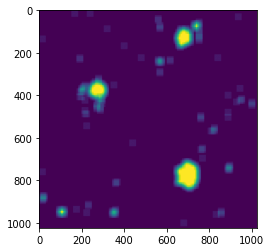

In [5]:
from segtools_fast import anom_scores, anom_scores_partial, imgseg
from matplotlib.pyplot import imread, imshow, show
test_im = imread('/content/drive/My Drive/Exjobb/val_ims/Kopia av 001.png')
stride = 8
anomap = anom_scores('cnn', cnn, test_im, seg_size, seg_size, channels, stride)
imshow(anomap)
show()

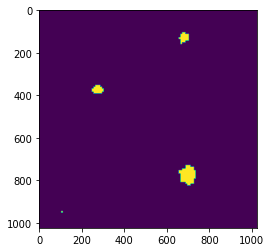

In [6]:
imshow(anomap > 15)
show()

In [7]:
cnn.trainable = True
cnn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
history_fine = train(cnn,train_generator, val_generator, 20)

Epoch 1/20
1922/1922 [==============================] - 113s 59ms/step - loss: 0.1474 - accuracy: 0.9591 - val_loss: 0.0698 - val_accuracy: 0.9906
Epoch 2/20
1922/1922 [==============================] - 113s 59ms/step - loss: 0.1025 - accuracy: 0.9708 - val_loss: 0.1015 - val_accuracy: 0.9844
Epoch 3/20
1922/1922 [==============================] - 112s 58ms/step - loss: 0.0803 - accuracy: 0.9762 - val_loss: 0.1208 - val_accuracy: 0.9813
Epoch 4/20
1922/1922 [==============================] - 111s 58ms/step - loss: 0.0602 - accuracy: 0.9810 - val_loss: 0.1289 - val_accuracy: 0.9781
Epoch 5/20
1922/1922 [==============================] - 111s 58ms/step - loss: 0.0455 - accuracy: 0.9852 - val_loss: 0.1620 - val_accuracy: 0.9802
Epoch 6/20
1922/1922 [==============================] - 110s 57ms/step - loss: 0.0333 - accuracy: 0.9886 - val_loss: 0.1405 - val_accuracy: 0.9834
Epoch 7/20
1922/1922 [==============================] - 109s 57ms/step - loss: 0.0259 - accuracy: 0.9911 - val_loss: 0

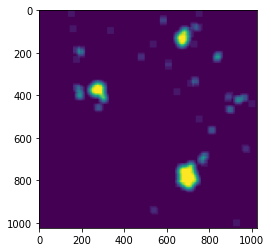

In [9]:
test_im = imread('/content/drive/My Drive/Exjobb/val_ims/Kopia av 001.png')
anomap = anom_scores('cnn', cnn, test_im, seg_size, seg_size, channels, stride)
imshow(anomap)
show()

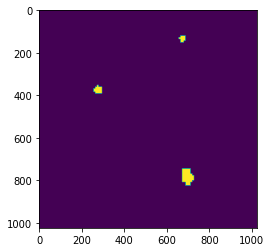

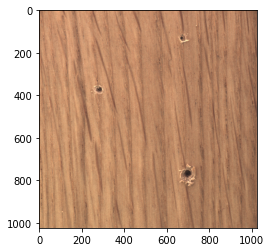

In [13]:
imshow(anomap > 15)
show()
imshow(test_im)
show()

In [ ]:
cnn.save('VGG19_TL_plates1-2-4+badpic_1+60epochs.h5')